In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import math



In [163]:
sample_size = 10000
x = np.random.normal(0, 1, sample_size)
y = np.random.normal(0, 1, sample_size)
points = np.array([x, y]).T



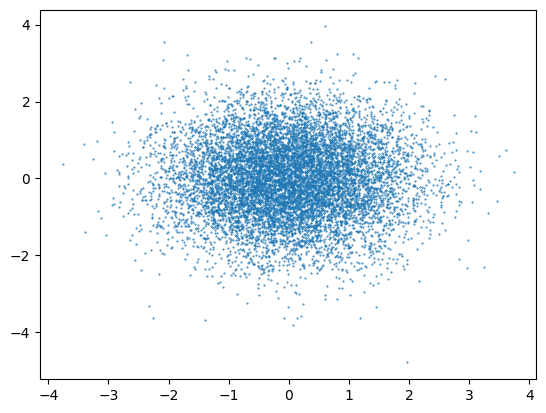

In [164]:
plt.scatter(x,y, s = 0.2)
plt.show()

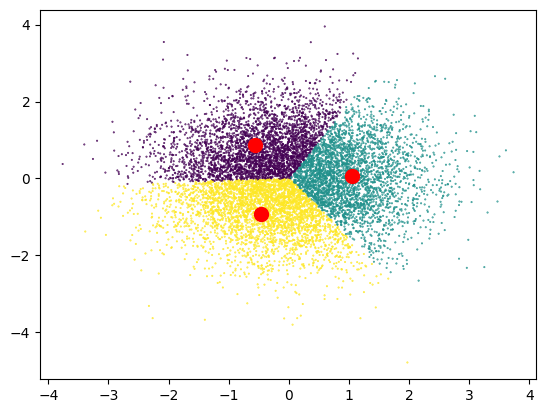

In [165]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(points)
centers = kmeans.cluster_centers_
plt.scatter(x, y, c=kmeans.labels_, s=0.2)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)

In [166]:
norm1 = math.sqrt(centers[0][0]**2 + centers[0][1]**2)
norm2 = math.sqrt(centers[1][0]**2 + centers[1][1]**2)
norm3 = math.sqrt(centers[2][0]**2 + centers[2][1]**2)
R1 = (norm1 + norm2 + norm3) / 3
print(R1)

1.0380977899697468


In [167]:
r_it = 10000
R_list = []

for i in range(r_it):
    x = np.random.normal(0, 1, sample_size)
    y = np.random.normal(0, 1, sample_size)
    points = np.array([x, y]).T
    kmeans = KMeans(n_clusters=3, random_state=42).fit(points)
    centers = kmeans.cluster_centers_
    norm1 = math.sqrt(centers[0][0]**2 + centers[0][1]**2)
    norm2 = math.sqrt(centers[1][0]**2 + centers[1][1]**2)
    norm3 = math.sqrt(centers[2][0]**2 + centers[2][1]**2)
    R_list.append((norm1 + norm2 + norm3) / 3)
print(R_list)



[1.0394606093671346, 1.0387081707362154, 1.027808887652319, 1.0292709896516603, 1.033713110601524, 1.0493256122855206, 1.03844385755689, 1.033504588789871, 1.0385214748004772, 1.0425483093638297, 1.0350437431109076, 1.04683534024537, 1.0330050738613423, 1.0448557247379622, 1.0420349494286538, 1.0266439010978223, 1.029680820555199, 1.0322017170623616, 1.0322213731623127, 1.0200923209522543, 1.0377751963799031, 1.0270314956021311, 1.0353996854252203, 1.0348927424332066, 1.036814738383628, 1.0244677275526348, 1.0359909740958828, 1.0456102875586852, 1.033723055551494, 1.0421979208180243, 1.0449259123174557, 1.031163332528664, 1.0300620040266215, 1.0336130378203785, 1.039090577721517, 1.0405909627683465, 1.0377215005466391, 1.0336058240023922, 1.0414097842906402, 1.028661427252324, 1.042985116493522, 1.040603789609887, 1.0429882004702868, 1.0340470795425203, 1.0397571003272696, 1.0368238267928975, 1.036877793981645, 1.0253976066578334, 1.041631156120324, 1.0393506936344166, 1.04664911869033

-0.00037621931545972487
-0.003758500799785347
-0.0015137249000571895
-1.981075006174393e-05
0.002588876447291666
0.0002946610725469423
-0.00039641279146729325
0.0002491107189261932
0.0006019720314762722
-0.0001897107245123486
0.0008245408241114305
-0.0003661782552923931
0.0005326079866507794
0.0002735419011434814
-0.0007225913571764497
-0.000458938288251165
-0.0002678953391586081
-0.00023866129819727355
-0.0008212477788804851
9.900798232975738e-05
-0.00039834277868999735
1.3006393895231838e-07
-2.100339938970741e-05
5.755671057849909e-05
-0.00042175576065828224
3.627231580716206e-05
0.00037722834549236417
-5.8691954444745065e-05
0.00022771635140261814
0.0003010246996808519
-0.00014786996244886552
-0.00017228173751404618
-5.770534725546561e-05
0.00010209324119170304
0.00013809875687065265
5.30809261829468e-05
-5.8020084254373216e-05
0.00014505685053434192
-0.00018090491795019759
0.00017727798636912873
0.00011213791836039988
0.0001623736165854428
-4.821429616330697e-05
8.081791221625778e

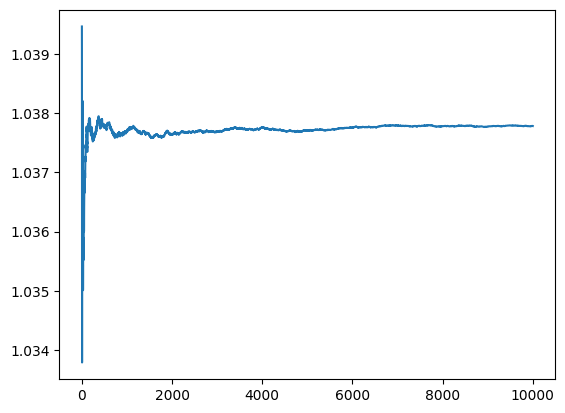

In [168]:
Cumulative = list(map(lambda x, y: x/y, np.cumsum(R_list), range(1, r_it+1)))
acc = 1e-9
for i in range(r_it - 1):
    print(Cumulative[i + 1] - Cumulative[i])
    if abs(Cumulative[i+1] - Cumulative[i]) < acc:
        print("number of iterations needed for 9 digit accuracy: ", i)
        break
plt.plot([i + 1 for i in range(r_it)], Cumulative)
plt.show()